In [1]:
#import data manupulation libraries
import pandas as pd
import numpy as np

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import filter warning libraries
import warnings
warnings.filterwarnings('ignore')

#Import logging libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filemode='w',
                    filename='logfile.log',
                    format='%(asctime)s - %(levelname)s - %(message)s',force=True)


In [2]:
#Data import 
url='https://raw.githubusercontent.com/Saimehtre18/Heart_Failure_Prediction/refs/heads/main/heart.csv'
df=pd.read_csv(url)
df.sample(frac=1)
print(df.sample(frac=1))

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
830   41   F           ATA        130          204          0        LVH   
721   51   M           NAP        100          222          0     Normal   
839   35   F           ASY        138          183          0     Normal   
76    32   M           ASY        118          529          0     Normal   
753   34   F           ATA        118          210          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
123   58   F           ATA        180          393          0     Normal   
640   48   F           NAP        130          275          0     Normal   
862   65   F           NAP        155          269          0     Normal   
200   47   M            TA        110          249          0     Normal   
636   48   M           ATA        130          245          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
830    172              N  

In [3]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [4]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [5]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])
df['Sex']=le.fit_transform(df['Sex'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(1), int64(10)
memory usage: 82.6 KB


In [14]:
Numerical_Data=df.select_dtypes(include=['int64','float64'])
Numerical_Data

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,140,289,0,1,172,0,0.0,2,0
1,49,2,160,180,0,1,156,0,1.0,1,1
2,37,1,130,283,0,2,98,0,0.0,2,0
3,48,0,138,214,0,1,108,1,1.5,1,1
4,54,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,3,110,264,0,1,132,0,1.2,1,1
914,68,0,144,193,1,1,141,0,3.4,1,1
915,57,0,130,131,0,1,115,1,1.2,1,1
916,57,1,130,236,0,0,174,0,0.0,1,1


In [15]:
from collections import OrderedDict

stats= []

for i in Numerical_Data:
    
    numerical_stats = OrderedDict({
        'Feature':i,
        'Maximum':Numerical_Data[i].max(),
        'Minimum':Numerical_Data[i].min(),
        'Median':Numerical_Data[i].median(),
        'Mean':Numerical_Data[i].mean(),
        'Standard Deviation':Numerical_Data[i].std(),
        'Variance':Numerical_Data[i].var(),
        '25%':Numerical_Data[i].quantile(0.25),
        '75%':Numerical_Data[i].quantile(0.75),
        'Kurtosis':Numerical_Data[i].kurt(),
        'Skewness':Numerical_Data[i].skew()
    })
    
    stats.append(numerical_stats)
    
    report=pd.DataFrame(stats)
    
report

,Feature,Maximum,Minimum,Median,Mean,Standard Deviation,Variance,25%,75%,Kurtosis,Skewness
0,Age,77.0,28.0,54.0,53.510893,9.432617,88.974254,47.00,60.0,-0.386140,-0.195933
1,ChestPainType,3.0,0.0,0.0,0.781046,0.956519,0.914929,0.00,2.0,-0.717257,0.793916
2,RestingBP,200.0,0.0,130.0,132.396514,18.514154,342.773903,120.00,140.0,3.271251,0.179839
3,Cholesterol,603.0,0.0,223.0,198.799564,109.384145,11964.891079,173.25,267.0,0.118208,-0.610086
4,FastingBS,1.0,0.0,0.0,0.233115,0.423046,0.178968,0.00,0.0,-0.401960,1.264484
5,RestingECG,2.0,0.0,1.0,0.989107,0.631671,0.399009,1.00,1.0,-0.487634,0.008492
6,MaxHR,202.0,60.0,138.0,136.809368,25.460334,648.228614,120.00,156.0,-0.448248,-0.144359
7,ExerciseAngina,1.0,0.0,0.0,0.404139,0.490992,0.241073,0.00,1.0,-1.850898,0.391329
8,Oldpeak,6.2,-2.6,0.6,0.887364,1.066570,1.137572,0.00,1.5,1.203064,1.022872
9,ST_Slope,2.0,0.0,1.0,1.361656,0.607056,0.368517,1.00,2.0,-0.665597,-0.381382


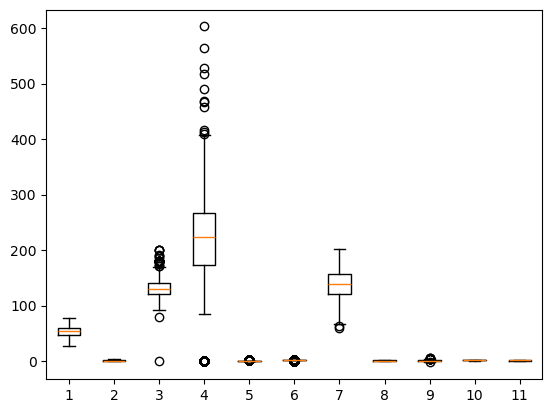

In [16]:
plt.boxplot(Numerical_Data)
plt.show()

In [19]:
X=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

In [22]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [24]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [26]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score_LR=accuracy_score(y_test,y_pred)
confusion_matrix_LR=confusion_matrix(y_test,y_pred)
print("Accuracy of Logistic Regression: ",accuracy_score_LR)
print("Confusion Matrix of Logistic Regression: \n",confusion_matrix_LR)

Accuracy of Logistic Regression:  0.8315217391304348
Confusion Matrix of Logistic Regression: 
 [[69  8]
 [23 84]]
